In [42]:
import pandas as pd

data = {
    "Method": ["Random 5%", "512 cluster", "Perplexity", "GPT-4", "Reward Model"],
    "MMLU": [39.3, 41.2, 41.1, 42.22, 41.23],
    "GSM8K": [15.16, 15.77, 15.68, 18.72, 21.38],
    "ARC": [53.10, 53.41, 54.08, 53.48, 53.11],
    "TruthfulQA": [43.91, 43.05, 43.23, 45.9, 44.13],
    "HellaSwag": [78.65, 79.50, 79.4, 78.0, 79.6],
    "CodeX": [27.0, 27.7, 25.1, 26.8, 28.42]
}

# Create the DataFrame
df = pd.DataFrame(data)
df.set_index('Method', inplace=True)

# Display the DataFrame
# add an average row
df = df.T
df.loc['Average'] = df.mean()
df

Method,Random 5%,512 cluster,Perplexity,GPT-4,Reward Model
MMLU,39.300000,41.200000,41.100000,42.220000,41.230
GSM8K,15.160000,15.770000,15.680000,18.720000,21.380
ARC,53.100000,53.410000,54.080000,53.480000,53.110
TruthfulQA,43.910000,43.050000,43.230000,45.900000,44.130
HellaSwag,78.650000,79.500000,79.400000,78.000000,79.600
CodeX,27.000000,27.700000,25.100000,26.800000,28.420
Average,42.853333,43.438333,43.098333,44.186667,44.645


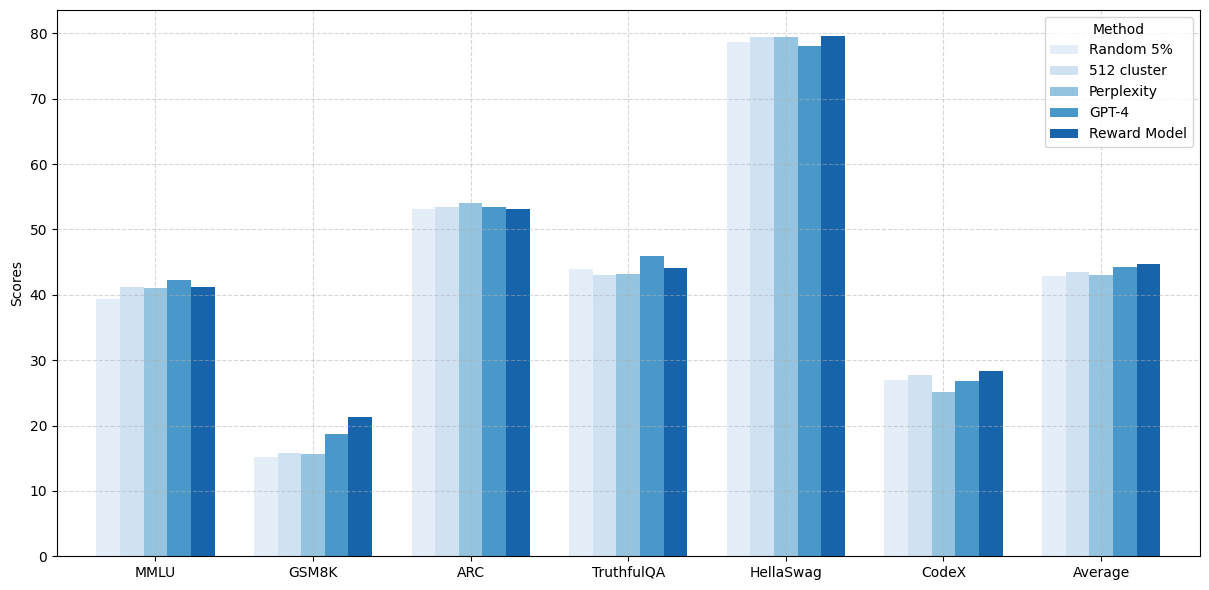

In [43]:
# make a bar chart based on the data
# set method as the index
# plot the data
# column should be the x-axis
# figsize is the size of the plot
import matplotlib.pyplot as plt
import seaborn as sns
# plot with matplotlib
fig, ax = plt.subplots(figsize=(12, 6))
# i said plot the data by matplotlib, not pandas
# sns.barplot(data=df, x=df.columns, ax=ax)
color_platte = sns.color_palette("Blues", as_cmap=True)
# get len(df.columns) colors from the color palette
color_platte = [color_platte(i * 1.0 / len(df.columns)) if i != 0 else color_platte((i+0.5) * 1.0/len(df.columns)) for i in range(len(df.columns))]
# get len(df.columns) colors from the color palette
# color_platte = color_platte[:len(df.columns)]
df.plot(kind='bar', ax=ax, color=color_platte, width=0.75, rot=0)
# narrow the gap between the bars
plt.tight_layout()
# add grid
# add y label as 'Scores'
plt.ylabel('Scores')
plt.grid(axis='both', linestyle='--', alpha=0.5)
# save as svg
plt.savefig('bar_chart.pdf')

In [44]:
import pandas as pd

data = {
    "Method": ["Random 5%", "RM Iter-1", "RM Iter-2", "RM Iter-3"],
    "MMLU": [39.3, 36.96, 39.21, 41.23],
    "GSM8K": [15.16, 12.22, 16.20, 21.38],
    "ARC": [53.10, 52.58, 52.76, 53.11],
    "TruthfulQA": [43.91, 42.38, 43.28, 44.13],
    "HellaSwag": [78.65, 78.6, 78.0, 79.6],
    "CodeX": [27.0, 23.9, 26.01, 28.42]
}
# Iteration 1	12.22	36.96	52.58	42.38	78.6	23.9
# Iteration 2	16.20	39.21	52.76	43.28	78.0	26.01
# Iteration 3	21.38	41.23	53.11	44.13	79.6	28.42

# Create the DataFrame
df = pd.DataFrame(data)
df

,Method,MMLU,GSM8K,ARC,TruthfulQA,CodeX
0,Random 5%,39.30,15.16,53.10,43.91,27.00
1,RM Iter-1,36.96,12.22,52.58,42.38,23.90
2,RM Iter-2,39.21,16.20,52.76,43.28,26.01
3,RM Iter-3,41.23,21.38,53.11,44.13,28.42


In [45]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go

categories = df.columns[1:]

fig = go.Figure()

for i in range(len(df)):
    fig.add_trace(go.Scatterpolar(
        r=df.iloc[i].values[1:].tolist(),
        theta=categories,
        name=df.iloc[i].values[0],
        mode = 'lines+markers',
    ))
# fig.add_trace(go.Scatterpolar(
#       r=df.iloc[0].values[1:].tolist(),
#       theta=categories,
#       fill='toself',
#       name='GPT-4'
# ))
# fig.add_trace(go.Scatterpolar(
#       r=[4, 3, 2.5, 1, 2],
#       theta=categories,
#       fill='toself',
#       name='Product B'
# ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 60]
    )),
  showlegend=True
)

# make the r rotate 90 degree
# fig.update_layout(polar=dict(startangle=90, direction=-1))
fig.show()
# save with tight layout
fig.write_image('radar_chart.pdf')

/var/folders/l4/lhgwgt5s3276lzd2bt9zt1g40000gn/T/ipykernel_77212/2358868454.py:49: UserWarning:


The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.



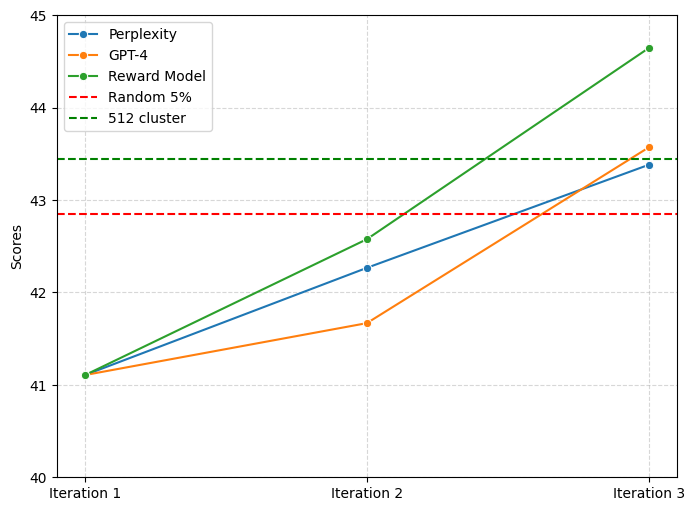

In [47]:
# Method	GSM8K	MMLU	ARC	TruthfulQA	HellaSwag	CodeX
# Random 5%	15.16	39.3	53.10	43.91	78.65	27.0
# 512 cluster	15.77	41.2	53.41	43.05	79.50	27.7
						
# Perplexity Iteration 1	12.22	36.96	52.58	42.38	78.6	23.9						
# Perplexity Iteration 2	14.58	38.59	53.33	43.3	78.2	25.6
# Perplexity Iteration 3	15.68	41.1	54.08	43.23	79.4	26.8
# GPT-4 Iteration 1	12.22	36.96	52.58	42.38	78.6	23.9					
# GPT-4 Iteration 2	13.21	39.29	52.10	44.21	77.2	24.0
# GPT-4 Iteration 3	16.72	42.22	53.48	45.9	78.0	25.1
# Reward Model Iteration 1	12.22	36.96	52.58	42.38	78.6	23.9				
# Reward Model Iteration 2	16.20	39.21	52.76	43.28	78.0	26.01
# Reward Model Iteration 3	21.38	41.23	53.11	44.13	79.6	28.42

# plot with iteration as the x-axis, and the y-axis is the average of the scores
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = {
    "Perplexity" : {
        "Iteration 1": [12.22, 36.96, 52.58, 42.38, 78.6, 23.9],
        "Iteration 2": [14.58, 38.59, 53.33, 43.3, 78.2, 25.6],
        "Iteration 3": [15.68, 41.1, 54.08, 43.23, 79.4, 26.8]
    },
    "GPT-4" : {
        "Iteration 1": [12.22, 36.96, 52.58, 42.38, 78.6, 23.9],
        "Iteration 2": [13.21, 39.29, 52.10, 44.21, 77.2, 24.0],
        "Iteration 3": [16.72, 42.22, 53.48, 45.9, 78.0, 25.1]
    },
    "Reward Model" : {
        "Iteration 1": [12.22, 36.96, 52.58, 42.38, 78.6, 23.9],
        "Iteration 2": [16.20, 39.21, 52.76, 43.28, 78.0, 26.01],
        "Iteration 3": [21.38, 41.23, 53.11, 44.13, 79.6, 28.42]
    }
}
# Create the DataFrame
mean_data = {}
for key, value in data.items():
    df = pd.DataFrame(value)
    mean_data[key] = df.mean()

df = pd.DataFrame(mean_data)
# compute the average of the scores
# df = df.mean()
df
# plot with matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
# plot with seaborn
sns.lineplot(data=df, ax=ax, markers='o', dashes=False)
plt.ylabel('Scores')
plt.grid(axis='both', linestyle='--', alpha=0.5)
# draw the average for Random 5% as a horizontal line
plt.axhline(y=42.85, color='r', linestyle='--', label='Random 5%')
# draw the average for 512 cluster as a horizontal line
plt.axhline(y=43.44, color='g', linestyle='--', label='512 cluster')
# have the ylim from 40 to 45
plt.ylim(40, 45)
# put the legend outside the plot
# plt.legend(loc='upper right', bbox_to_anchor=(1.27, 1.1))
plt.legend()
# save as svg
plt.savefig('line_chart.pdf')